Processing subfolder: female
Loaded 399 images, each with shape (36000,) for female


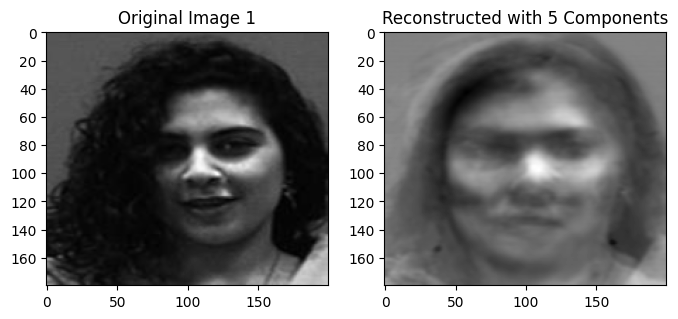

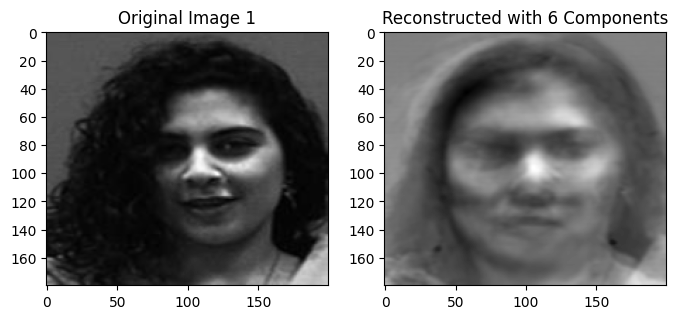

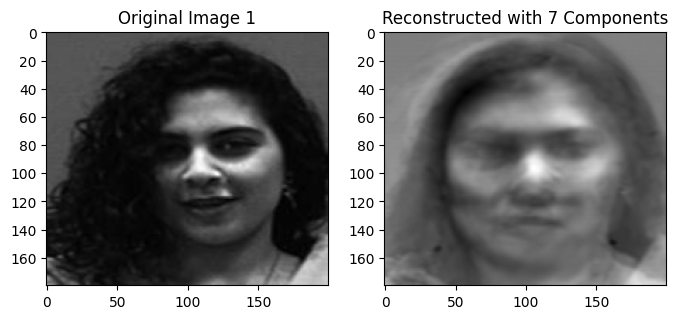

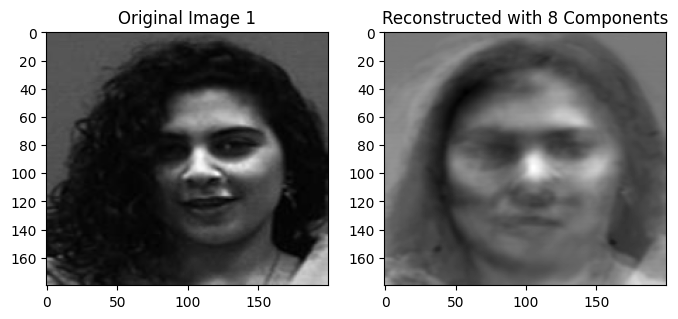

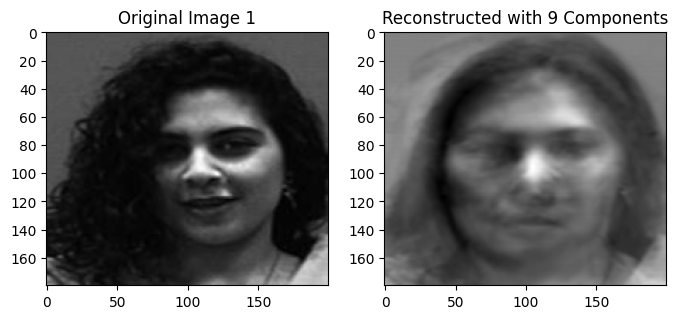

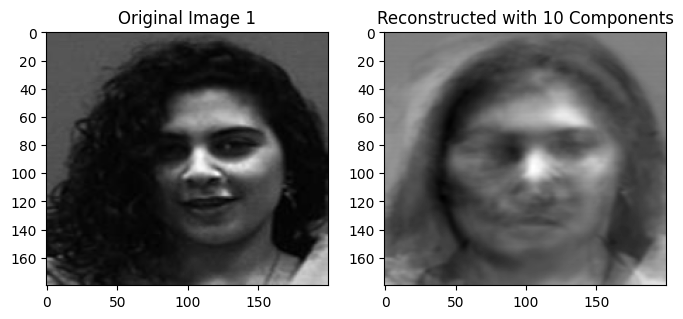

Processing subfolder: male
Loaded 2260 images, each with shape (36000,) for male


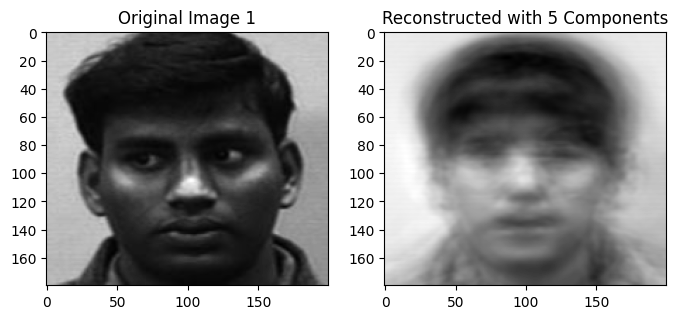

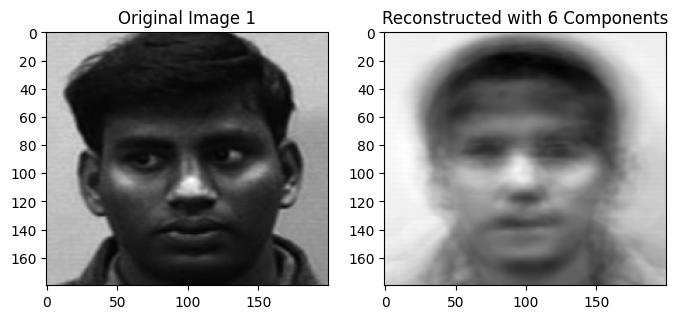

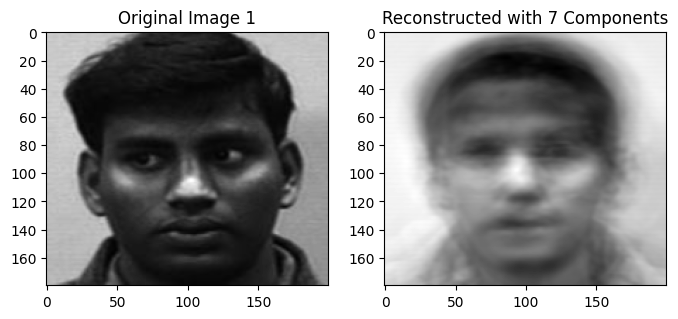

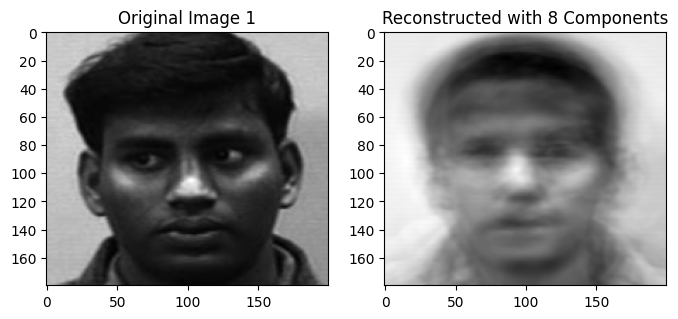

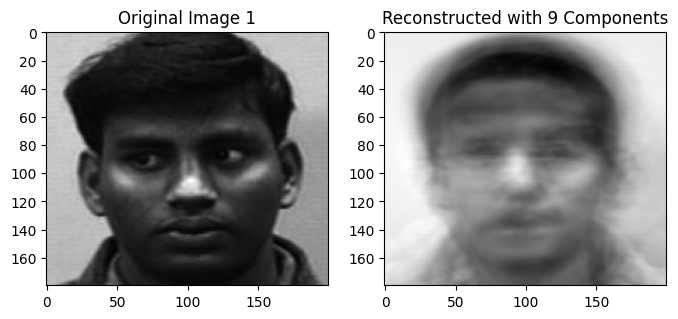

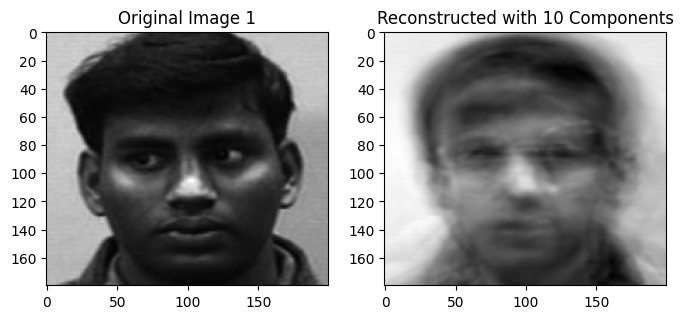

Processing subfolder: malestaff
Loaded 400 images, each with shape (36000,) for malestaff


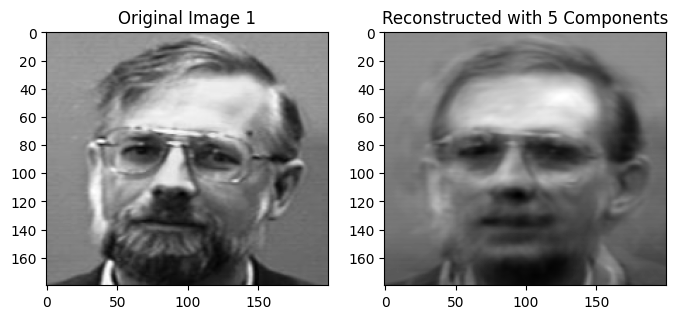

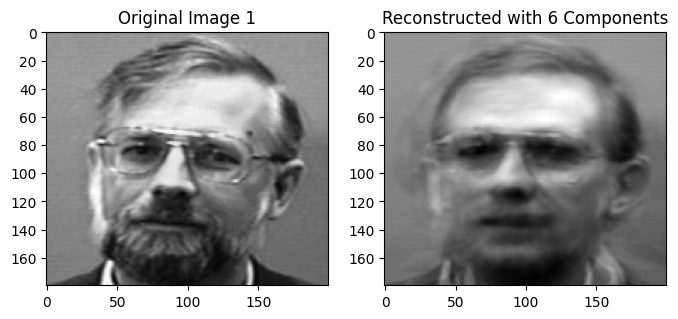

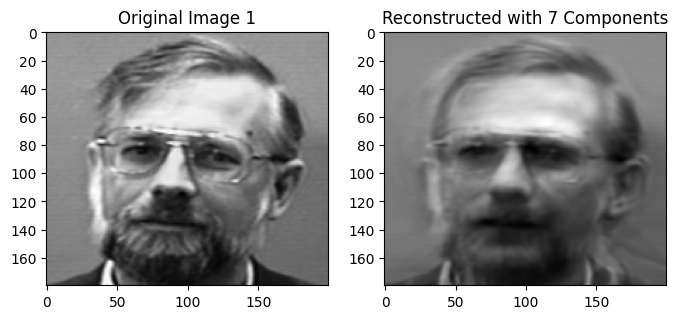

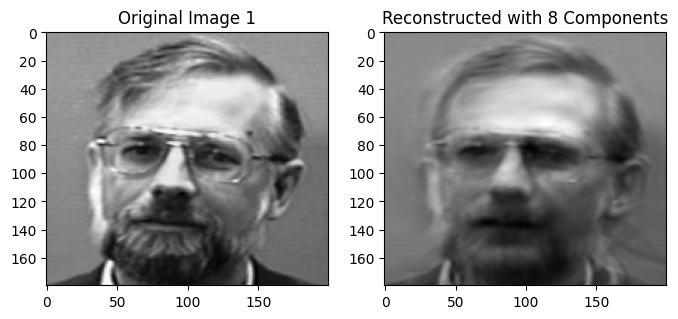

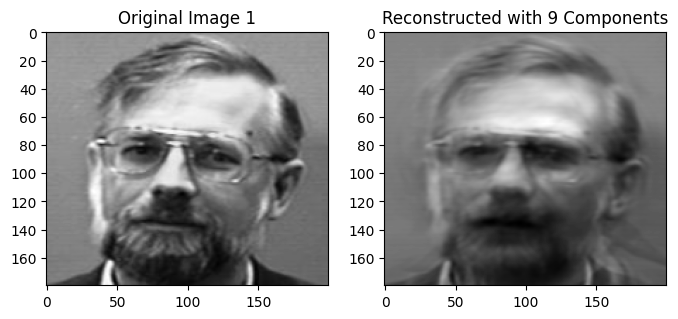

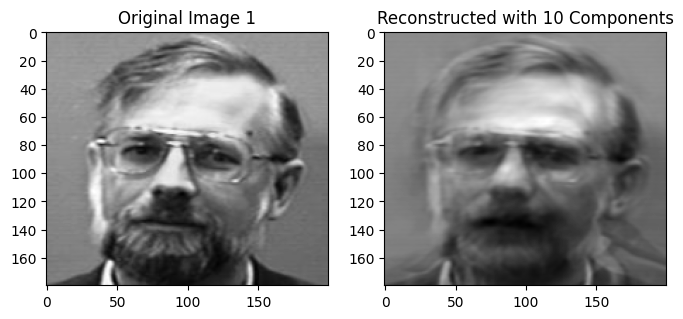

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
import urllib.request
import zipfile

# Download and extract the faces94 dataset
url = "http://cmp.felk.cvut.cz/~spacelib/faces/faces94.zip"
urllib.request.urlretrieve(url, "faces94.zip")

# Extract the downloaded zip file
with zipfile.ZipFile("faces94.zip", 'r') as zip_ref:
    zip_ref.extractall("faces94")

# Function to load images from a specified subfolder and preprocess them
def load_images_from_folder(subfolder_path, target_size=(180, 200)):
    image_data = []  # List to store flattened images
    for person_name in os.listdir(subfolder_path):
        person_folder_path = os.path.join(subfolder_path, person_name)

        # Check if it's a directory
        if os.path.isdir(person_folder_path):
            for image_name in os.listdir(person_folder_path):
                image_path = os.path.join(person_folder_path, image_name)

                # Only process image files (skip others)
                if not image_path.lower().endswith(('.jpg', '.jpeg')):
                    # Uncomment if you'd like to see which files are skipped
                    # print(f"Skipping non-image file: {image_path}")
                    continue

                try:
                    # Read the image from the file
                    image = imread(image_path)

                    # If the image is colored (RGB), convert it to grayscale
                    if len(image.shape) == 3:
                        image = rgb2gray(image)

                    # Resize the image to the target size
                    image_resized = resize(image, target_size, anti_aliasing=True)

                    # Flatten the image and append to the image_data list
                    image_data.append(image_resized.flatten())
                except Exception as e:
                    print(f"Could not load image {image_path}: {e}")

    return np.array(image_data)

# Main loop to process images from each subfolder
root_folder = r"/content/faces94/faces94"  # Replace with your root folder path
subfolders = ['female', 'male', 'malestaff']  # Subfolders to process

# Process each subfolder
for subfolder in subfolders:
    print(f"Processing subfolder: {subfolder}")
    subfolder_path = os.path.join(root_folder, subfolder)

    # Load images from the current subfolder
    images = load_images_from_folder(subfolder_path)

    if images.size == 0:
        print(f"No images found in subfolder: {subfolder}")
        continue

    print(f"Loaded {len(images)} images, each with shape {images[0].shape} for {subfolder}")

    # Perform PCA to reduce the dimensionality of the images
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(images)
    X_reconstructed = pca.inverse_transform(X_pca)

    # List of PCA component numbers to visualize
    pca_components_list = [5, 6, 7, 8, 9, 10]  # Number of components to visualize

    # Loop through the first image in the dataset (you can change this to process more)
    for image_idx in range(min(1, len(images))):  # Ensure we have enough images to process
        for components in pca_components_list:
            plt.figure(figsize=(8, 4))

            # Reconstruct the image using the current number of components
            pca_subset = PCA(n_components=components)
            X_subset = pca_subset.fit_transform(images)
            X_reconstructed_subset = pca_subset.inverse_transform(X_subset)

            # Display the original image
            plt.subplot(1, 2, 1)
            plt.imshow(images[image_idx].reshape(180, 200), cmap='gray')
            plt.title(f'Original Image {image_idx + 1}')

            # Display the reconstructed image with the specified number of components
            plt.subplot(1, 2, 2)
            plt.imshow(X_reconstructed_subset[image_idx].reshape(180, 200), cmap='gray')
            plt.title(f'Reconstructed with {components} Components')

            # Show the plot
            plt.show()
